# 🍄🍄 Binary Prediction of Poisonous Mushrooms 🍄🍄

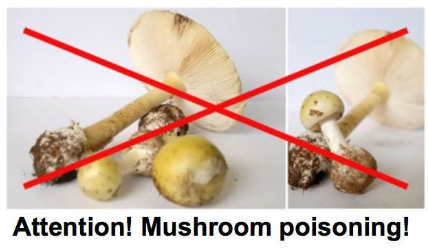

### **Data Features**

<style>
  table {
    font-size: 30px;
    text-align: left;
    width: 100%;
  }
  th {
    font-weight: bold;
    padding: 8px;
    background-color: #f2f2f2;
    font-size: 30px;
  }
  td {
    padding: 8px;
  }
</style>

<table>
  <tr>
    <th>Field</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>id</td>
    <td>Unique Identifier</td>
  </tr>
  <tr>
    <td>class</td>
    <td>Indicates if the mushroom is <strong>poisonous (p)</strong> or <strong>edible (e)</strong></td>
  </tr>
  <tr>
    <td>cap-diameter</td>
    <td>Diameter of the cap (in mm)</td>
  </tr>
  <tr>
    <td>cap-shape</td>
    <td>Shape of the cap</td>
  </tr>
  <tr>
    <td>cap-surface</td>
    <td>Surface texture of the cap</td>
  </tr>
  <tr>
    <td>cap-color</td>
    <td>Color of the cap</td>
  </tr>
  <tr>
    <td>does-bruise-or-bleed</td>
    <td>Indicates if the mushroom bruises or bleeds</td>
  </tr>
  <tr>
    <td>gill-attachment</td>
    <td>Attachment of the gills to the stem</td>
  </tr>
  <tr>
    <td>gill-spacing</td>
    <td>Spacing between the gills</td>
  </tr>
  <tr>
    <td>gill-color</td>
    <td>Color of the gills</td>
  </tr>
  <tr>
    <td>stem-height</td>
    <td>Height of the stem (in mm)</td>
  </tr>
  <tr>
    <td>stem-width</td>
    <td>Width of the stem (in mm)</td>
  </tr>
  <tr>
    <td>stem-root</td>
    <td>Structure of the stem's base</td>
  </tr>
  <tr>
    <td>stem-surface</td>
    <td>Surface texture of the stem</td>
  </tr>
  <tr>
    <td>stem-color</td>
    <td>Color of the stem</td>
  </tr>
  <tr>
    <td>veil-type</td>
    <td>Type of the veil on the cap</td>
  </tr>
  <tr>
    <td>veil-color</td>
    <td>Color of the veil</td>
  </tr>
  <tr>
    <td>has-ring</td>
    <td>Indicates if there is a ring on the stem</td>
  </tr>
  <tr>
    <td>ring-type</td>
    <td>Type of ring on the stem</td>
  </tr>
  <tr>
    <td>spore-print-color</td>
    <td>Color of the spore print left by the mushroom</td>
  </tr>
  <tr>
    <td>habitat</td>
    <td>The environment where the mushroom is found</td>
  </tr>
  <tr>
    <td>season</td>
    <td>The season in which the mushroom was observed</td>
  </tr>
</table>


In [1]:
import numpy as np
import pandas as pd 
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


In [2]:
# Load the datasets
df = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')

In [3]:
df.head(2)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

# Data Cleaning 

First We dont need ID coulmn so i will DROP it 

In [5]:
# Drop the 'id' column from both datasets
df.drop(columns=['id'], axis=1, inplace=True)
test_df.drop(columns=['id'], axis=1, inplace=True)

In [6]:
df.duplicated().sum()

0

Good There is no duplicated

Lets check the Missing values

## Missing Values

In [7]:
missing_values = df.isnull().sum()
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the missing values count and percentage for each column
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_info)


                      Missing Values  Percentage
class                              0    0.000000
cap-diameter                       4    0.000128
cap-shape                         40    0.001283
cap-surface                   671023   21.528227
cap-color                         12    0.000385
does-bruise-or-bleed               8    0.000257
gill-attachment               523936   16.809280
gill-spacing                 1258435   40.373988
gill-color                        57    0.001829
stem-height                        0    0.000000
stem-width                         0    0.000000
stem-root                    2757023   88.452732
stem-surface                 1980861   63.551362
stem-color                        38    0.001219
veil-type                    2957493   94.884350
veil-color                   2740947   87.936970
has-ring                          24    0.000770
ring-type                     128880    4.134818
spore-print-color            2849682   91.425482
habitat             

**The dataset has a significant amount of missing data in several columns, which requires careful consideration**

#### 1. Assess the Severity of Missing Data

Columns like veil-type, veil-color, stem-root, spore-print-color, gill-spacing, stem-surface, and cap-surface **have a large percentage of missing values.**

These columns with more than **50% missing** data might not contribute meaningfully to your model and could be candidates for removal.

#### 2. Decide on a Strategy

Drop Columns: If a column has too many missing values (e.g., more than 50%), consider dropping it, especially if it’s unlikely to provide valuable information.

Impute Missing Values: For columns with fewer missing values, we can fill in the missing data (imputation) using different strategies:

    - For numerical columns like cap-diameter: Use the mean, median, or mode.
    - For categorical columns like cap-shape, cap-color: Use the mode (most frequent value).
    
Custom Imputation: after  insights from EDA, we can use more sophisticated imputation techniques, such as filling based on other related columns.

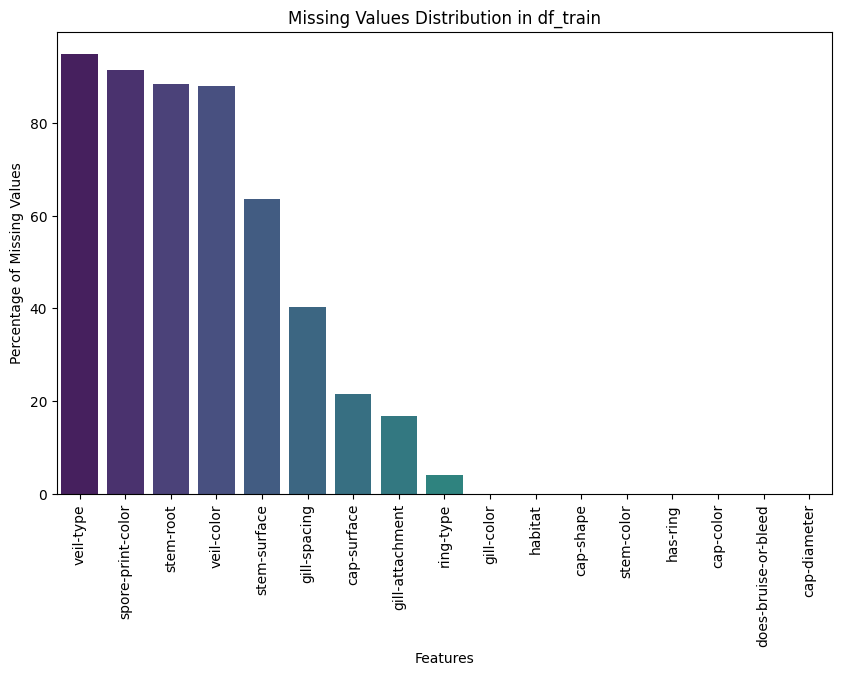

In [8]:
missing_values = df.isnull().mean() * 100
missing_values = missing_values[missing_values >0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Distribution in df_train')
plt.show()

**i Will remove this columns**

In [9]:
columns_to_drop = ['veil-type', 'veil-color', 'stem-root', 'spore-print-color',]
df = df.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)

In [10]:
'''
# For categorical features
categorical_cols = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
                    'gill-attachment', 'gill-spacing', 'gill-color',
                    'stem-surface', 'stem-color',
                    'has-ring', 'ring-type', 'habitat']

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Replace NaN with the mode

# For numerical features
numerical_cols = ['cap-diameter']

for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)  # Replace NaN with the median
'''

"\n# For categorical features\ncategorical_cols = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',\n                    'gill-attachment', 'gill-spacing', 'gill-color',\n                    'stem-surface', 'stem-color',\n                    'has-ring', 'ring-type', 'habitat']\n\nfor col in categorical_cols:\n    df[col].fillna(df[col].mode()[0], inplace=True)  # Replace NaN with the mode\n\n# For numerical features\nnumerical_cols = ['cap-diameter']\n\nfor col in numerical_cols:\n    df[col].fillna(df[col].median(), inplace=True)  # Replace NaN with the median\n"

#### **Becouse i work with XGoost model which do imputation automatic i iwll not do it with my self i tryed but when i left the missin to the XGboost he did better**

## Class Distribution ( Data Imbalance ?? )

To understand the class imbalance in our dataset, you can check the distribution of the target variable (class) to see how many mushrooms are labeled as edible (e) and how many are labeled as poisonous (p).

#### **1. Check Class Distribution**

In [11]:
# Get the counts of each class
class_counts = df['class'].value_counts()

# Calculate the percentage of each class
class_percentage = df['class'].value_counts(normalize=True) * 100

# Display the counts and percentages
class_distribution = pd.DataFrame({'Count': class_counts, 'Percentage': class_percentage})
print(class_distribution)


         Count  Percentage
class                     
p      1705396   54.713702
e      1411549   45.286298


#### **3. Interpret the Results**

If the classes are relatively balanced (close to 50-50), you may not need to do anything special.

If the classes are imbalanced (e.g., 90-10), you'll need to consider strategies to address this, such as:
    - Resampling: Either oversample the minority class or undersample the majority class.
    - Use of Algorithms: Some algorithms like XGBoost or Random Forest handle imbalance better.
    - Class Weights: Assign higher weights to the minority class during model training.


In our Data its clear that its Have a good Distribution **around 50% for each class** so we don't need to do some this here 

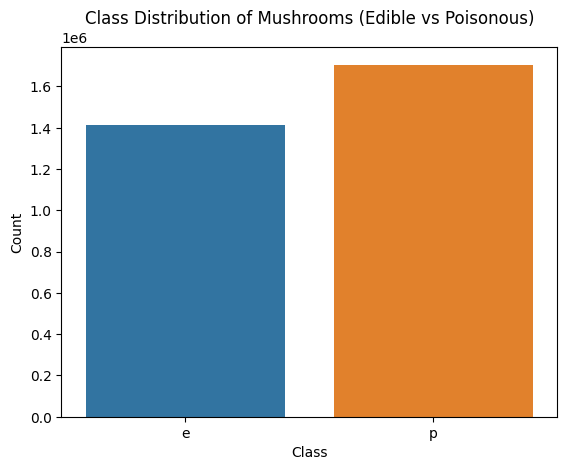

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the class distribution
sns.countplot(x='class', data=df)
plt.title('Class Distribution of Mushrooms (Edible vs Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## OutLiers Check

 Checking for outliers is an essential step in data preprocessing, especially in numerical features, as outliers can significantly impact your model's performance.
 
**Visualizing Outliers Using Box Plots**

Box plots are a great way to visually identify outliers. Here’s how you can create box plots for the numerical features in your dataset:

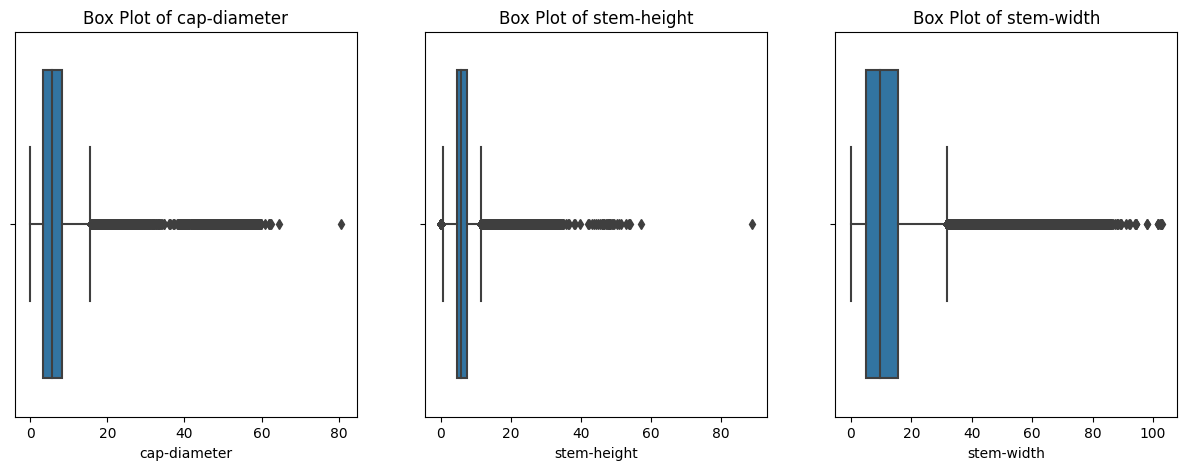

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']

# Plotting box plots for each numerical feature
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.show()


In [14]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Apply the function to each numerical column
for column in numerical_columns:
    outliers = detect_outliers_iqr(df, column)
    print(f"Number of outliers in {column}: {outliers.shape[0]}")


Number of outliers in cap-diameter: 76124
Number of outliers in stem-height: 132419
Number of outliers in stem-width: 66481


Okey It looks like we have a outliers here, we cant consider all of this as outliers becouse some of them are logicaly true value

#### **How Handling Outliers**
Once you’ve identified outliers, you have several options:

**Remove Outliers**: If the outliers are likely errors or not relevant, you can remove them

**Cap Outliers**: Replace outliers with the upper or lower bound of the non-outlier data.
python

i will drop for now only the very high outlier bettwen (0.01, 0.99)

In [15]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.01)
    Q3 = data[column].quantile(0.99)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]
for column in numerical_columns:
    outliers = detect_outliers_iqr(df, column)
    print(f"Number of outliers in {column}: {outliers.shape[0]}")


Number of outliers in cap-diameter: 11358
Number of outliers in stem-height: 35
Number of outliers in stem-width: 26


In [16]:
# Removing outliers from each numerical column
for column in numerical_columns:
    df = df[~df.index.isin(detect_outliers_iqr(df, column).index)]


## 2. Univariate Feature Selection

# Encoding

Lets first check the value counts in each column

In [17]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
df[cat_cols].nunique()

class                    2
cap-shape               73
cap-surface             82
cap-color               78
does-bruise-or-bleed    26
gill-attachment         78
gill-spacing            48
gill-color              63
stem-surface            60
stem-color              59
has-ring                23
ring-type               40
habitat                 52
season                   4
dtype: int64

#### **Okey Now there is a problem We uselly use ONE HOT ENCODING but if we used it we will have a very very big number of features which will be hard to intterapt**

#### **So we can perform rare encoding followed by either one-hot encoding or label encoding based on the number of unique classes in each categorical variable.**

**threshold=0.01: This defines the threshold for rare encoding, meaning any class that appears in less than 1% of the data will be labeled as 'Rare'.**

In [18]:
def rare_encoding(df, threshold=0.01):
    for column in df.select_dtypes(include='object').columns:
        if column in df.columns:
            freq = df[column].value_counts(normalize=True)
            rare_classes = freq.index[freq < threshold]
            df[column] = df[column].where(~df[column].isin(rare_classes), 'Rare')
    return df

# Separate the target column
target = df['class']
df_features = df.drop(columns=['class'])

# Apply rare encoding to both datasets
df_features = rare_encoding(df_features)
test_df = rare_encoding(test_df)

# Align columns
common_cols = df_features.columns.intersection(test_df.columns)
df_features = df_features[common_cols]
test_df = test_df[common_cols]

# Reattach the target column
df = pd.concat([df_features, target], axis=1)

# Verify columns
print("df columns:", df.columns)
print("test_df columns:", test_df.columns)


df columns: Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-surface', 'stem-color', 'has-ring',
       'ring-type', 'habitat', 'season', 'class'],
      dtype='object')
test_df columns: Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-surface', 'stem-color', 'has-ring',
       'ring-type', 'habitat', 'season'],
      dtype='object')


In [19]:
print(df.shape)
print(test_df.shape)

(3105529, 17)
(2077964, 16)


In [20]:
df[cat_cols].nunique()

class                    2
cap-shape                8
cap-surface             12
cap-color               13
does-bruise-or-bleed     3
gill-attachment          8
gill-spacing             4
gill-color              13
stem-surface             8
stem-color               9
has-ring                 3
ring-type                8
habitat                  6
season                   4
dtype: int64

#### **Choose Encoding Method**

After rare encoding, we can decide between one-hot encoding and label encoding based on the number of unique classes.

In [21]:
def encode_categorical(df, target_column=None, max_unique_classes=10):
    for column in df.select_dtypes(include='object').columns:
        if column != target_column:
            unique_classes = df[column].nunique()
            if unique_classes <= max_unique_classes:
                df = pd.get_dummies(df, columns=[column], drop_first=True)
            else:
                le = LabelEncoder()
                df[column] = le.fit_transform(df[column])
    return df

# Separate the target column
target = df['class']
df_features = df.drop(columns=['class'])

# Apply encoding
df_features = encode_categorical(df_features)
test_df = encode_categorical(test_df)

# Ensure both datasets have the same columns
common_cols = df_features.columns.intersection(test_df.columns)
df_features = df_features[common_cols]
test_df = test_df[common_cols]

# Reattach the target column
df = pd.concat([df_features, target], axis=1)

# Verify columns
print("df columns:", df.columns)
print("test_df columns:", test_df.columns)


df columns: Index(['cap-diameter', 'cap-surface', 'cap-color', 'gill-color', 'stem-height',
       'stem-width', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x',
       'does-bruise-or-bleed_f', 'does-bruise-or-bleed_t', 'gill-attachment_a',
       'gill-attachment_d', 'gill-attachment_e', 'gill-attachment_f',
       'gill-attachment_p', 'gill-attachment_s', 'gill-attachment_x',
       'gill-spacing_c', 'gill-spacing_d', 'gill-spacing_f', 'stem-surface_g',
       'stem-surface_h', 'stem-surface_i', 'stem-surface_k', 'stem-surface_s',
       'stem-surface_t', 'stem-surface_y', 'stem-color_e', 'stem-color_g',
       'stem-color_n', 'stem-color_o', 'stem-color_p', 'stem-color_u',
       'stem-color_w', 'stem-color_y', 'has-ring_f', 'has-ring_t',
       'ring-type_e', 'ring-type_f', 'ring-type_g', 'ring-type_l',
       'ring-type_p', 'ring-type_r', 'ring-type_z', 'habitat_d', 'habitat_g',
       'habitat_h', 'habitat_l', 'habit

In [22]:
print(df.shape)
print(test_df.shape)

(3105529, 58)
(2077964, 57)


In [23]:
# Map the target 'class' column to 0 and 1
df['class'] = df['class'].map({'e': 0, 'p': 1})

# Feature Selection

Feature selection involves identifying the most relevant features that contribute to the model’s predictive power.
i will try 4 ways to do that 

## **Correlation Analysis**

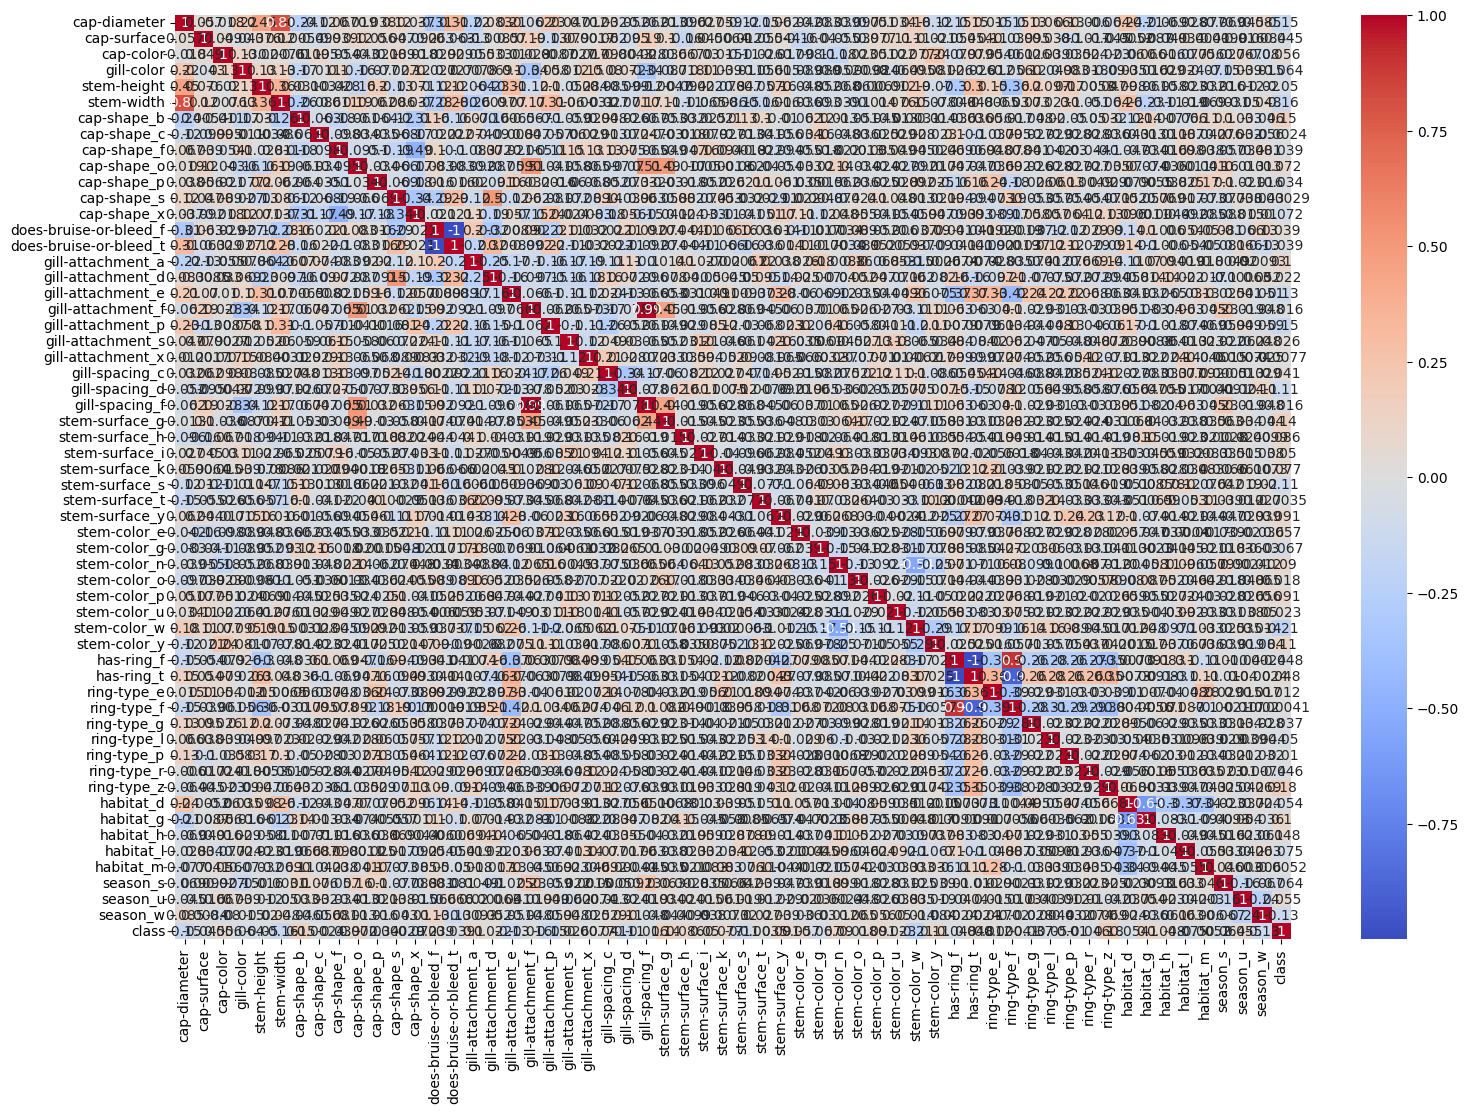

In [24]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


Okey it's clear that we can't know any thing from this heatmap so we will use the otherways 

## **Univariate Feature Selection**


techniques like **SelectKBest** to select features based on **statistical** tests.

In [25]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Assuming X is a pandas DataFrame and y is the target column in the DataFrame

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# Impute missing values with the median for numerical features
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Convert imputed data back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Perform feature selection
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X_imputed_df, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['cap-diameter', 'stem-width', 'cap-shape_b', 'gill-attachment_e',
       'gill-attachment_p', 'gill-spacing_d', 'stem-surface_g', 'stem-color_w',
       'ring-type_z', 'season_w'],
      dtype='object')


In [26]:
'''Selected= ['class', 'cap-diameter', 'stem-width', 'cap-shape_b', 'gill-attachment_a',
       'gill-attachment_e', 'gill-attachment_p', 'stem-surface_g',
       'stem-color_w', 'ring-type_z', 'season_w']
testSelected= ['cap-diameter', 'stem-width', 'cap-shape_b', 'gill-attachment_a',
       'gill-attachment_e', 'gill-attachment_p', 'stem-surface_g',
       'stem-color_w', 'ring-type_z', 'season_w']
df_SELECTED = df[Selected]
df.shape
test_df_SELECTED = test_df[testSelected]'''

"Selected= ['class', 'cap-diameter', 'stem-width', 'cap-shape_b', 'gill-attachment_a',\n       'gill-attachment_e', 'gill-attachment_p', 'stem-surface_g',\n       'stem-color_w', 'ring-type_z', 'season_w']\ntestSelected= ['cap-diameter', 'stem-width', 'cap-shape_b', 'gill-attachment_a',\n       'gill-attachment_e', 'gill-attachment_p', 'stem-surface_g',\n       'stem-color_w', 'ring-type_z', 'season_w']\ndf_SELECTED = df[Selected]\ndf.shape\ntest_df_SELECTED = test_df[testSelected]"

### **Its not logic for me he takes a classes from the same features and left the others !!**
### i tried it any way but ofcourse i got bad accuracy that without delete the features 
### **So i will leave the columns without selection for now**

**i will try later :**

**Recursive Feature Elimination (RFE) :** RFE selects features by recursively considering smaller sets of features. This method is particularly useful for model selection.

 **Feature Importance from Tree-Based Models :** Tree-based models like Random Forest or XGBoost can provide feature importance directly.



# Modeling


## 4. Feature Importance from Tree-Based Models

Tree-based models like Random Forest or XGBoost can provide feature importance directly.

In [27]:
# Separate features and target
X_train = df.drop('class', axis=1)
y_train = df['class']

# Test data (no target)
X_test = test_df.copy()

In [28]:
# Define DataFrames for training and test data
train_columns = set(df.columns)
test_columns = set(test_df.columns)

# Find columns in train_df but not in test_df
train_only_columns = train_columns - test_columns

# Find columns in test_df but not in train_df
test_only_columns = test_columns - train_columns

# Print the columns that are different
print("Columns in train_df but not in test_df:")
print(train_only_columns)

print("\nColumns in test_df but not in train_df:")
print(test_only_columns)


Columns in train_df but not in test_df:
{'class'}

Columns in test_df but not in train_df:
set()


In [29]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [30]:
# Predict on the test data 
test_predictions = xgb_model.predict(X_test)

# Evaluate the model on training data using train_test_split 
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
y_val_pred = xgb_model.predict(X_val_split)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_val_split, y_val_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_val_split, y_val_pred))


Accuracy: 0.9910
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    280067
           1       0.99      0.99      0.99    341039

    accuracy                           0.99    621106
   macro avg       0.99      0.99      0.99    621106
weighted avg       0.99      0.99      0.99    621106

Confusion Matrix:
[[277670   2397]
 [  3203 337836]]


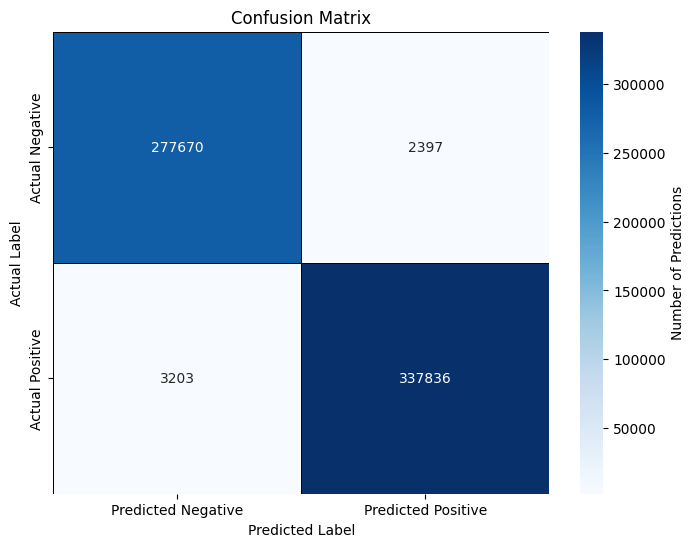

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the confusion matrix
conf_matrix = confusion_matrix(y_val_split, y_val_pred)

# Convert the confusion matrix to a DataFrame for better visualization with seaborn
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', 
            linewidths=0.5, linecolor='black', 
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


#### **AS you see The accuracy is : 0.991**

#### **the other metrics (f1-socre, recall, precision)is okey**

#### **I am still Updating the notebook every day and trying to hyperparametar tuning and try another things to share with you**
### **So please if you found it usefull UPVOTE me **
### **Thanks**